**SPARKS FOUNDATION**



In [ ]:
# Import required libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [ ]:
# Read the CSV file :
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
# Let’s select some features to explore more :
data = data[["Hours","Scores"]]

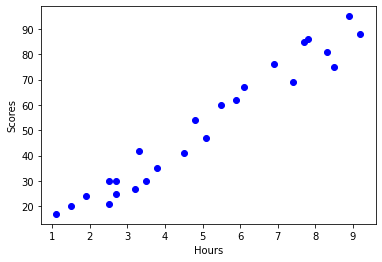

In [ ]:
# HOURS vs SCORES:
plt.scatter(data['Hours'] , data['Scores'] , color='blue')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

In [ ]:
# Generating training and testing data from our data:
# We are using 80% data for training.
train = data[:(int((len(data)*0.8)))]
test = data[(int((len(data)*0.8))):]

In [ ]:
# Modeling:
# Using sklearn package to model data :
regr = linear_model.LinearRegression()
train_x = np.array(train[['Hours']])
train_y = np.array(train[['Scores']])
regr.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# The coefficients:
print ('coefficients :',regr.coef_) #Slope
print ('Intercept :' ,regr.intercept_) #Intercept

coefficients : [[9.52038609]]
Intercept : [3.03128304]


Text(0, 0.5, 'Scores')

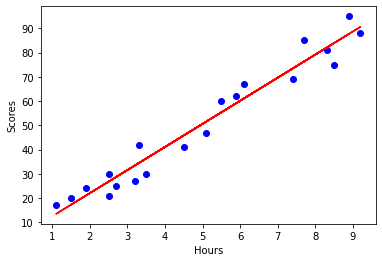

In [ ]:
# Plotting the regression line:
plt.scatter(train['Hours'], train['Scores'], color='blue')
plt.plot(train_x, regr.coef_*train_x + regr.intercept_, '-r')
plt.xlabel('Hours')
plt.ylabel('Scores')

In [ ]:
# Predicting values:
# Function for predicting future values :
def get_regression_predictions(input_features,intercept,slope):
 predicted_values = input_features*slope + intercept
 return predicted_values

In [ ]:
# Predicting emission for future car:
my_engine_size = 3.5
estimatd_emission = get_regression_predictions(my_engine_size,regr.intercept_[0],regr.coef_[0][0])
print ('Estimated Emission :',estimatd_emission)

Estimated Emission : 36.35263437090784


In [ ]:
# Checking various accuracy:
from sklearn.metrics import r2_score
test_x = np.array(test[['Hours']])
test_y = np.array(test[['Scores']])
test_y_ = regr.predict(test_x)
print('Mean absolute error: %.2f' % np.mean(np.absolute(test_y_ - test_y)))
print('Mean sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y) ** 2))
print('R2-score: %.2f' % r2_score(test_y_ , test_y) )

Mean absolute error: 5.35
Mean sum of squares (MSE): 35.18
R2-score: 0.89


In [ ]:
hours = int(input('Enter the Total hours played : '))
user_pred = regr.predict([[hours]])
print("No of Hours = {}".format(hours))
print(user_pred[0])
print("Predicted Scores for Winning A Game = {:.2f} %".format(user_pred[0][0]))

Enter the Total hours played : 8
No of Hours = 8
[79.1943718]
Predicted Scores for Winning A Game = 79.19 %
